In [1]:
#This function takes amino acids and returns their corresponding hydropathy levels. 
def hydropathy(seq):
    dictionary = {"I": 4.5, "V" : 4.2, "L" : 3.8, "F" : 2.8, "C" : 2.5, "M" : 1.9, "A" : 1.8, "G" : -0.4, "T" : -0.7, "S" : -0.8, "W" : -0.9, "Y" : -1.3, "P" : -1.6, "H" : -3.2, "E" : -3.5, "Q" : -3.5, "D" : -3.5, "N" : -3.5, "K" : -3.9, "R" : -4.5}
    hydropathy = []
    for aa in seq:
        hydropathy.append(dictionary[aa])
    return hydropathy

In [2]:
#This function takes the hydropathy levels and a given window, and returns a list of averages of each window. 
def avg(hydropathy, window):
    avg_list = []
    for i in range(window, len(hydropathy)):
        aa_mean = (sum(hydropathy[(i-window):(i+window)]))/(2*window)
        avg_list.append(aa_mean)
    return avg_list

In [3]:
#This function takes a certain window value, and makes a list of the range of values of the window in ascending and descending order. 
#This function will help to make the weighted averages of the hydropathy levels. 
weights= []
def windowFunc(window):
    #weights= []
    for i in range(1, window+1): 
        weights.append(i)
    w = window
    for i in range(1,window):
        w = w - 1 
        weights.append(w)
    print(weights)
windowFunc(11)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [4]:
#This function makes an array for the hydropathy levels. 
import numpy as np
def weightavg(hydropathy, window):
    avg_list = []
    for i in range(window, len(hydropathy)):
        aa_mean = (sum(hydropathy[(i-window):(i+window)]))/(2*window)
        avg_list.append(aa_mean)
    weightsarray = np.array([hydropathy])
    return weightsarray

In [5]:
#transcription function
def transcribe(DNA_Sequence):
    Dictionary = {"A": "U", "T": "A", "C": "G", "G": "C"}
    mRNA = ""
    for item in DNA_Sequence:
        mRNA += Dictionary[item]
    return mRNA

In [6]:
#translation function
def translate(rnaseq):
    ProteinDict = {"UUU":"F", "UUC":"F", "UUA":"L", "UUG":"L", "CUU":"L", "CUC":"L", "CUA":"L", "CUG":"L", "AUU":"I", "AUC":"I", "AUA":"I", "AUG":"M", "GUU":"V", "GUC":"V", "GUA":"V", "GUG":"V", "UCU":"S", "UCC":"S", "UCA":"S", "UCG":"S", "CCU":"P", "CCC":"P", "CCA":"P", "CCG":"P", "ACU":"T", "ACC":"T", "ACA":"T", "ACG":"T", "GCU":"A", "GCC":"A", "GCA":"A", "GCG":"A", "UAU":"Y", "UAC":"Y", "UAA":"", "UAG":"", "CAU":"H", "CAC":"H", "CAA":"Q", "CAG":"Q", "AAU": "N", "AAC":"N", "AAA":"K", "AAG":"K", "GAU":"D", "GAC":"D", "GAA":"E", "GAG":"E", "UGU":"C", "UGC":"C", "UGA":"", "UGG":"W", "CGU":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGU":"S", "AGC":"S", "AGA":"R", "AGG":"R", "GGU":"G", "GGC":"G", "GGA":"G", "GGG":"G"} 
    codon = ""
    protein = ""
    for base in rnaseq:
        print(base)
        codon += base
        if len(codon) == 3:
            protein += ProteinDict[codon]
            codon = ""
    return protein

In [7]:
#This function creates lists of weighted averages for the hydropathy levels. 
AAavgs = []
def weighted_avg(seq, window):
    for i in range(window, len(seq)-window): 
        AAHarray = np.array(seq[(i-window):(i+window+1)])
        AAHmean= np.sum(AAHarray * weights)/np.sum(weights) 
        AAavgs.append(AAHmean)
    return AAavgs
aaavgs = AAavgs
ran = range(len(aaavgs))

In [8]:
#hemoglobin
hemo = open("Hemoglobin.txt").read()

In [9]:
transcribehemo = transcribe(hemo)

In [10]:
translatehemo = translate(transcribehemo)

A
U
G
G
U
G
C
A
C
C
U
G
A
C
U
C
C
U
G
A
G
G
A
G
A
A
G
U
C
U
G
C
C
G
U
U
A
C
U
G
C
C
C
U
G
U
G
G
G
G
C
A
A
G
G
U
G
A
A
C
G
U
G
G
A
U
G
A
A
G
U
U
G
G
U
G
G
U
G
A
G
G
C
C
C
U
G
G
G
C
A
G
G
U
U
G
G
U
A
U
C
A
A
G
G
U
U
A
C
A
A
G
A
C
A
G
G
U
U
U
A
A
G
G
A
G
A
C
C
A
A
U
A
G
A
A
A
C
U
G
G
G
C
A
U
G
U
G
G
A
G
A
C
A
G
A
G
A
A
G
A
C
U
C
U
U
G
G
G
U
U
U
C
U
G
A
U
A
G
G
C
A
C
U
G
A
C
U
C
U
C
U
C
U
G
C
C
U
A
U
U
G
G
U
C
U
A
U
U
U
U
C
C
C
A
C
C
C
U
U
A
G
G
C
U
G
C
U
G
G
U
G
G
U
C
U
A
C
C
C
U
U
G
G
A
C
C
C
A
G
A
G
G
U
U
C
U
U
U
G
A
G
U
C
C
U
U
U
G
G
G
G
A
U
C
U
G
U
C
C
A
C
U
C
C
U
G
A
U
G
C
U
G
U
U
A
U
G
G
G
C
A
A
C
C
C
U
A
A
G
G
U
G
A
A
G
G
C
U
C
A
U
G
G
C
A
A
G
A
A
A
G
U
G
C
U
C
G
G
U
G
C
C
U
U
U
A
G
U
G
A
U
G
G
C
C
U
G
G
C
U
C
A
C
C
U
G
G
A
C
A
A
C
C
U
C
A
A
G
G
G
C
A
C
C
U
U
U
G
C
C
A
C
A
C
U
G
A
G
U
G
A
G
C
U
G
C
A
C
U
G
U
G
A
C
A
A
G
C
U
G
C
A
C
G
U
G
G
A
U
C
C
U
G
A
G
A
A
C
U
U
C
A
G
G
G
U
G
A
G
U
C
U
A
U
G
G
G
A
C
C
C
U
U
G
A
U
G
U
U
U
U
C
U
U
U
C
C
C
C
U
U
C
U
U
U
U
C
U
A
U
G
G
U
U
A
A
G
U
U


In [17]:
hemoglobin = hydropathy(translatehemo)
rangehemo = range(len(hemoglobin))

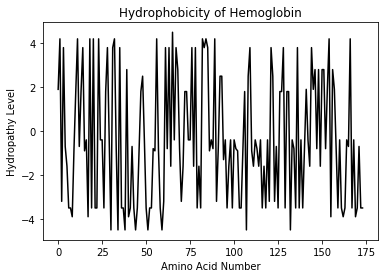

In [20]:
plt.plot(rangehemo, hemoglobin,  color = "black")
plt.title("Hydrophobicity of Hemoglobin")
plt.xlabel("Amino Acid Number")
plt.ylabel("Hydropathy Level")
plt.savefig("Hydrophobicity of Hemoglobin_rough")
plt.show()

In [12]:
hemoglobin2 = weighted_avg(hemoglobin, 10)
aaavgs = AAavgs
ran = range(len(aaavgs))

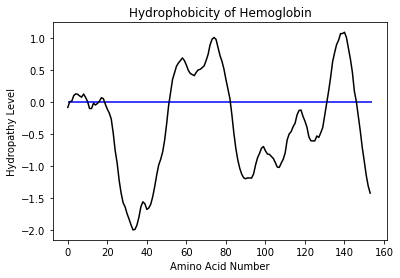

In [21]:
import matplotlib.pyplot as plt
plt.plot(ran, aaavgs, color = "black")
plt.hlines(0, 0, len(aaavgs), color = "blue")
plt.title("Hydrophobicity of Hemoglobin")
plt.xlabel("Amino Acid Number")
plt.ylabel("Hydropathy Level")
plt.savefig("Hydrophobicity of Hemoglobin")
plt.show()